# Create UMAP mapping
To create a meaningful UMAP mapping the DataComp-1B dataset is used.  
It is stream processed to avoid to having to downlaod 340GB Data

In [1]:
from datasets import load_dataset
dataset = load_dataset("mlfoundations/datacomp_1b",split='train', streaming=True)

Resolving data files:   0%|          | 0/2664 [00:00<?, ?it/s]

In [2]:
subset = list(dataset.take(5000))
captions = list(map(lambda x:x['text'], subset))

CLIP is used to create the embeddings

In [5]:
from utils.model import CLIP
clip = CLIP()
embeddings = clip.embed(captions, pooled=True).cpu()

In [6]:
import umap
reducer = umap.UMAP(metric='cosine')
mapping = reducer.fit(embeddings)

## First insights

In [7]:
from utils.data import descriptions
prompts = list(descriptions[:,0])
prompts

['a blue truck', 'a blue plain', 'a orange truck', 'a orange plain']

In [10]:
test_embeddings = clip.embed(prompts, pooled=True).cpu()

In [11]:
reduced = mapping.transform(test_embeddings)

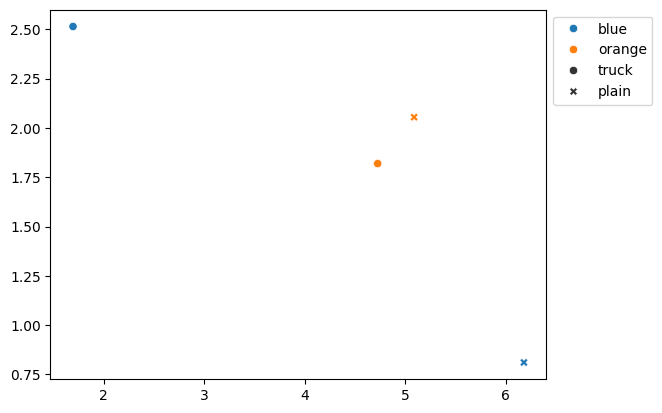

In [12]:
from utils.plot import plot
plot(reduced, meta=descriptions)

## Saving
Using joblig the mapping can be saved for later usage

In [13]:
import joblib
joblib.dump(mapping, 'dump/umap_cosine.sav')

['dump/umap_cosine.sav']

## Further experiments using PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(embeddings)
pca.explained_variance_ratio_

array([0.03605065, 0.02322896])

In [17]:
reduced_pca = pca.transform(test_embeddings)

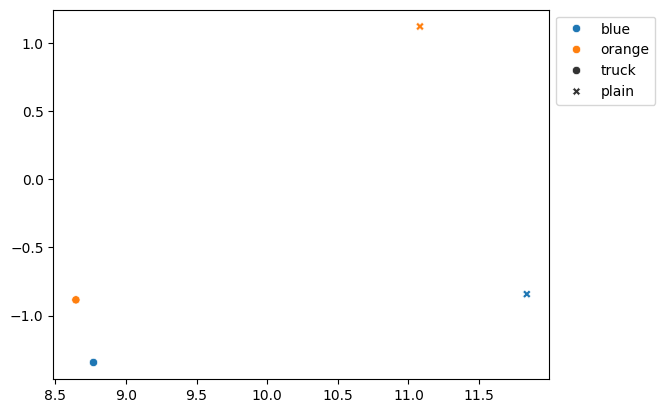

In [19]:
plot(reduced_pca, meta=descriptions)

In [20]:
joblib.dump(pca, 'dump/pca.sav')

['dump/pca.sav']